In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Limit GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [3]:
# Specify the desired input shape for InceptionV3
input_shape = (299, 299, 3)

In [4]:
# Create an ImageDataGenerator with rescaling and resizing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    preprocessing_function=lambda x: tf.image.resize(x, (input_shape[0], input_shape[1])),
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],
    channel_shift_range=50,
    fill_mode='nearest'
)

In [5]:
# Specify the path to your dataset
dataset_path = "C:/Users/user_99/Desktop/data_of_parikar"

In [6]:
# Create data generators for training, validation, and test
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 11441 images belonging to 13 classes.
Found 2851 images belonging to 13 classes.


In [7]:
# Further split the validation_generator into validation and test generators
validation_split = 0.5
test_split = 0.5

num_validation_samples = int(validation_split * validation_generator.samples)
num_test_samples = int(test_split * validation_generator.samples)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Important: Set shuffle to False to ensure consistency between validation and test splits
)

test_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
)

# Adjust the number of validation and test steps based on your batch size
num_validation_steps = num_validation_samples // 32
num_test_steps = num_test_samples // 32

Found 2851 images belonging to 13 classes.
Found 2851 images belonging to 13 classes.


In [8]:
# Load the pre-trained InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the convolutional base, unfreeze the last few layers
for layer in base_model.layers[:-50]:
    layer.trainable = False

In [9]:
# Create a new model with additional dense layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [10]:
# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), #0.0001
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Train the model using the data generators and save the history
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
358/358 [==============================] - 337s 922ms/step - loss: 1.0289 - accuracy: 0.7707 - val_loss: 0.3959 - val_accuracy: 0.8804
Epoch 2/30
358/358 [==============================] - 312s 872ms/step - loss: 0.3613 - accuracy: 0.8942 - val_loss: 0.3659 - val_accuracy: 0.9007
Epoch 3/30
358/358 [==============================] - 314s 877ms/step - loss: 0.2700 - accuracy: 0.9184 - val_loss: 0.3445 - val_accuracy: 0.9141
Epoch 4/30
358/358 [==============================] - 310s 865ms/step - loss: 0.2326 - accuracy: 0.9339 - val_loss: 0.2913 - val_accuracy: 0.9221
Epoch 5/30
358/358 [==============================] - 310s 868ms/step - loss: 0.2150 - accuracy: 0.9403 - val_loss: 0.3007 - val_accuracy: 0.9256
Epoch 6/30
358/358 [==============================] - 309s 864ms/step - loss: 0.1829 - accuracy: 0.9514 - val_loss: 0.3150 - val_accuracy: 0.9302
Epoch 7/30
358/358 [==============================] - 310s 868ms/step - loss: 0.1603 - accuracy: 0.9564 - val_loss: 0.3435 -

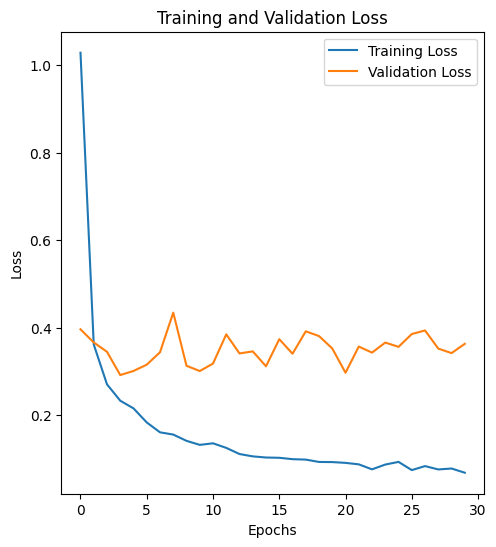

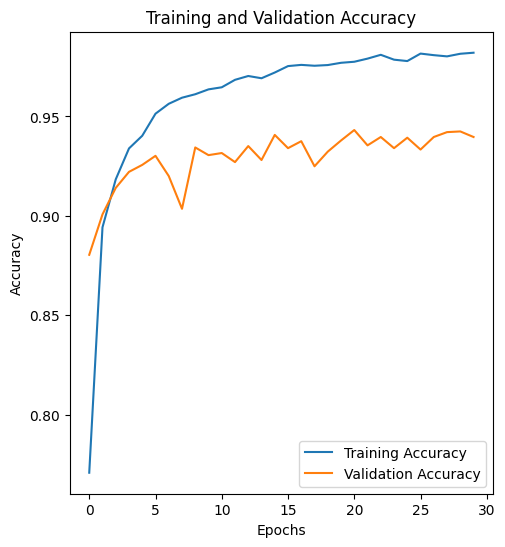

Training and validation loss plot saved at: C:/Users/user_99/Desktop/training_validation_loss_plot.jpg
Training and validation accuracy plot saved at: C:/Users/user_99/Desktop/training_validation_accuracy_plot.jpg


In [12]:
# Save the training and validation loss plots as JPG files
save_dir = "C:/Users/user_99/Desktop/"
save_file_loss = os.path.join(save_dir, "training_validation_loss_plot.jpg")

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(save_file_loss)
plt.show()
plt.close()

# Save the training and validation accuracy plots as JPG files
save_file_accuracy = os.path.join(save_dir, "training_validation_accuracy_plot.jpg")

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(save_file_accuracy)
plt.show()
plt.close()

# Display the saved file paths
print(f"Training and validation loss plot saved at: {save_file_loss}")
print(f"Training and validation accuracy plot saved at: {save_file_accuracy}")

In [13]:
# Evaluate the model on the validation set
validation_results = model.evaluate(validation_generator, steps=num_validation_steps)
print("Validation Loss:", validation_results[0])
print("Validation Accuracy:", validation_results[1])

# Evaluate the model on the test set
test_results = model.evaluate(test_generator, steps=num_test_steps)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

44/44 [==============================] - 30s 670ms/step - loss: 0.2624 - accuracy: 0.9581
Validation Loss: 0.2624025344848633
Validation Accuracy: 0.9580965638160706
44/44 [==============================] - 30s 666ms/step - loss: 0.2557 - accuracy: 0.9517
Test Loss: 0.2557371258735657
Test Accuracy: 0.9517045617103577


In [14]:
# Convert the model to TensorFlow Lite with post-training quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

tflite_model_path = "C:/Users/user_99/Desktop/tflite_model_inceptionv3.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\user_99\AppData\Local\Temp\tmpstpv6fdj\assets


In [15]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


tflite_model_path = "C:/Users/user_99/Desktop/tflite_model.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\user_99\AppData\Local\Temp\tmp19jk73a5\assets


INFO:tensorflow:Assets written to: C:\Users\user_99\AppData\Local\Temp\tmp19jk73a5\assets
